# Classificação de Imagens com LSTMs - MNIST

In [1]:
import tensorflow
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregando os dados
mnist = tensorflow.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train shape:", x_train.shape)

x_train shape: (60000, 28, 28)


In [3]:
# Construindo o modelo
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinando o modelo
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.3424 - accuracy: 0.8896 - val_loss: 0.1411 - val_accuracy: 0.9558
Epoch 2/10
60000/60000 [==============================] - 10s 161us/sample - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.1065 - val_accuracy: 0.9668
Epoch 3/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0720 - accuracy: 0.9785 - val_loss: 0.0698 - val_accuracy: 0.9792
Epoch 4/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0716 - val_accuracy: 0.9781
Epoch 5/10
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0531 - val_accuracy: 0.9838
Epoch 6/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 7/10
60000/60000 [====================

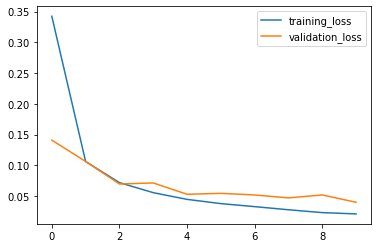

In [4]:
# Plotando a loss por iteração
plt.plot(r.history['loss'], label='training_loss')
plt.plot(r.history['val_loss'], label='validation_loss')
plt.legend()

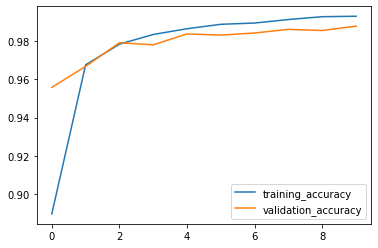

In [5]:
# Plotando o MSE por iteração
plt.plot(r.history['accuracy'], label='training_accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')
plt.legend()

Matriz de Confusão, sem normalização
[[ 974    0    0    0    0    0    3    1    2    0]
 [   0 1131    1    0    0    0    1    2    0    0]
 [   3    2 1021    0    0    0    2    3    1    0]
 [   0    0    5  996    1    2    0    3    3    0]
 [   0    1    1    0  965    0    5    0    3    7]
 [   1    0    0    9    0  874    3    1    2    2]
 [   1    5    0    0    0    1  946    0    5    0]
 [   1    7    2    1    6    0    0 1008    0    3]
 [   0    0    1    0    0    0    0    1  967    5]
 [   0    1    0    0    5    2    1    2    1  997]]


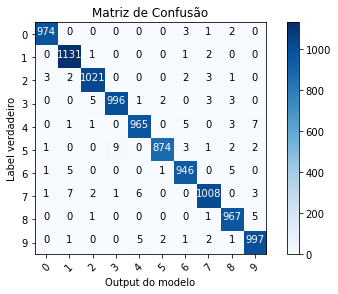

In [6]:
# Plotando a matriz de confusão
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Matriz de Confusão', cmap=plt.cm.Blues):
    # Essa função printa e plota a matriz de confusão.
    # A normalização pode ser aplicada setando 'normalize=True' nos parâmetros.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão normalizada")
    else:
        print('Matriz de Confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label verdadeiro')
    plt.xlabel('Output do modelo')
    plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Os resultados fazem sentido?
# O modelo está confundindo 7 com 1, 4 com 9.. então faz sentido.

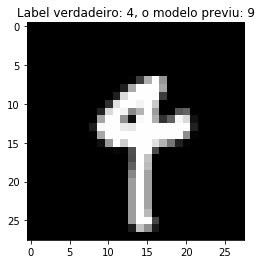

In [7]:
# Mostrando alguns exemplos classificados de forma errada
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("Label verdadeiro: %s, o modelo previu: %s" % (y_test[i], p_test[i]));